In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time

# Сложность алгоритмов

In [4]:
%%time
for i in range(1000000):
    pass

Wall time: 333 ms


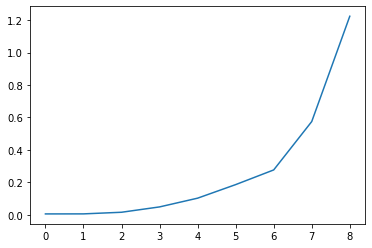

In [5]:
times = []

for n in [2**i for i in range(1, 10)]:
    start = time.time()
    for i in range(n):
        for j in range(n):
            pass
    for i in range(10000*n):
        pass
    end = time.time()
    times.append(end - start)
    
plt.plot(times);

In [6]:
# window operations
# complexity of alpha

# Задача "Самый частый символ"
Дана строка. Найти самый частый встречающийся в ней символ. Если несколько символов встречаются одинаково часто, вывести любой из них.

In [7]:
s = 'ababa'

def find_symb(s):
    ans = ''
    for elem1 in s:
        cnt = 0
        max_cnt = 0
        for elem2 in s:
            if elem1 == elem2:
                cnt += 1
            if cnt > max_cnt:
                ans = elem1
                max_cnt = cnt
    return ans

find_symb(s)

'a'

In [8]:
s = 'ababa'
# O(N*K)

def find_symb(s):
    ans = ''
    for elem1 in set(s):
        cnt = 0
        max_cnt = 0
        for elem2 in s:
            if elem1 == elem2:
                cnt += 1
            if cnt > max_cnt:
                ans = elem1
                max_cnt = cnt
    return ans

find_symb(s)

'b'

In [9]:
s = 'ababa'
# O(N+K)

def find_symb(s):
    ans = ''
    lib = {}
    for elem in s:
        if elem not in lib:
            lib[elem] = 0
        lib[elem] += 1
    max_cnt = 0
    for key in lib:
        if lib[key] > max_cnt:
            max_cnt = lib[key]
            ans = key
    return ans

find_symb(s)

'a'

# Задача "Квадратное уравнение"
Даны три целых числа a, b, c. Найти все корни уравнения $ax^2+bx+c=0$ и вывести в порядке возрастания.

In [10]:
def find_solutions(a,b,c):
    D = b**2 - 4*a*c
    if D >= 0:
        x_1, x_2 = (-b - np.sqrt(D)) / (2*a), (-b + np.sqrt(D)) / (2*a)
        if D == 0: return x_1
    elif a == 0:
        return -c/b
    elif a == 0 and b == 0:
        if c == 0:
            return('any solution')
        elif c != 0:
            return('no solutions')
    else:
        return('no solutions')
    return min(x_1, x_2), max(x_1, x_2)

find_solutions(-1,2,1)

(-0.41421356237309515, 2.414213562373095)

# Задача "Размен"

Переведите определенное количество денег в данные номиналы, используя как можно меньше монет.

1. Входные данные: 
Целое число money и массив из d номиналов $c=(c_1, ..., c_d) $ в порядке убывания $(c_1>...>c_d)$.
2. Выходные данные: 
Список из $d$ целых чисел $i_1, ..., i_d$, в котором $c_1*i_1+...c_d*i_d=money$ и $i_1+...i_d$ как можно меньше.

In [11]:
money = 40
c = [25, 20, 10, 5, 1]
# 1, 2, 4, 8, 40
# money / c[i],  money**len(c) -> O(c^n)

In [12]:
def give_change(money, c):
    idx = 0
    ans = [0 for i in range(len(c))]
    while money > 0: # and idx < len(c):
        if money >= c[idx]:
            money = money - c[idx]
            ans[idx] += 1
        else:
            idx += 1
    return ans

give_change(money, c)

[1, 0, 1, 1, 0]

In [13]:
import itertools
c = [1,2,3]

for elem in itertools.permutations(c, r=None):
    print(elem)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


# Домашка

## 1 балл

1. Привести пример альфы и указать сложность алгоритма и пространственную сложность для нее (по элементно и асимптотическую)
2. Даны три натуральных числа. Возможно ли построить треугольник с такими сторонами. Если это возможно, выведите строку YES, иначе выведите строку NO. Треугольник — это три точки, не лежащие на одной прямой.
3. Решите в целых числах уравнение: $\sqrt{ax+b} = c$. a, b, c -- данные целые числа. Найти все решения или сообщить, что решений в целых числах нет.

### 1

### 2

In [14]:
def triangle(a, b, c):
    if a + b > c and b + c > a and a + c > b:
        return 'YES'
    else:
        return 'NO'


triangle(1, 1, 1)

'YES'

### 3

In [15]:
def equation(a, b, c):
    if c >= 0 and a != 0 and (c ** 2 - b) / a == int((c ** 2 - b) / a):
        return int((c ** 2 - b) / a)
    elif a == 0 and b == c ** 2:
        return "x - любой"
    else:
        return "Нет решений в целых числах"

equation(2, 3, 0)

'Нет решений в целых числах'

____

## 2 балла

4. Бригада скорой помощи выехала по вызову в один из отделенных районов. К сожалению, когда диспетчер получил вызов, он успел записать только адрес дома и номер квартиры K1, а затем связь прервалась. Однако он вспомнил, что по этому же адресу дома некоторое время назад скорая помощь выезжала в квартиру K2, которая расположена в подъезда P2 на этаже N2. Известно, что в доме M этажей и количество квартир на каждой лестничной площадке одинаково. Напишите программу, которая вычилсяет номер подъезда P1 и номер этажа N1 квартиры K1.

## Формат ввода

Во входном файле записаны пять положительных целых чисел K1, M, K2, P2, N2. Все числа не превосходят 10^6.

## Формат вывода

Выведите два числа P1 и N1. Если входные данные не позволяют однозначно определить P1 или N1, вместо соответствующего числа напечатайте 0. Если входные данные противоречивы, напечатайте два числа –1 (минус один).

### Пример 1

Ввод: 89 20 41 1 11
Вывод: 2 3

### Пример 2

Ввод: 11 1 1 1 1
Вывод: 0 1

### Пример 3

Ввод: 3 2 2 2 1
Вывод: -1 -1

4


____

5. Имеется N кг металлического сплава. Из него изготавливают заготовки массой K кг каждая. После этого из каждой заготовки вытачиваются детали массой M кг каждая (из каждой заготовки вытачивают максимально возможное количество деталей). Если от заготовок после этого что-то остается, то этот материал возвращают к началу производственного цикла и сплавляют с тем, что осталось при изготовлении заготовок. Если того сплава, который получился, достаточно для изготовления хотя бы одной заготовки, то из него снова изготавливают заготовки, из них – детали и т.д. Напишите программу, которая вычислит, какое количество деталей может быть получено по этой технологии из имеющихся исходно N кг сплава.

## Формат ввода

Вводятся N, K, M. Все числа натуральные и не превосходят 200.

## Формат вывода

Выведите одно число — количество деталей, которое может получиться по такой технологии.



### Пример 1

Ввод: 10 5 2
Вывод: 4

### Пример 2

Ввод: 13 5 3
Вывод: 3

### Пример 3

Ввод: 14 5 3
Вывод: 4

In [20]:
n, k, m = map(int, input().split())
d = 0
if k >= m:
    while n // k > 0:
        ost_zgt = n % k
        d += (k // m) * (n // k)
        ost_det = (k % m) * (n // k)
        n = ost_det + ost_zgt
    print(d)
else:
    print(0)

3


____

5. За многие годы заточения узник замка Иф проделал в стене прямоугольное отверстие размером D × E. Замок Иф сложен из кирпичей, размером A × B × C. Определите, сможет ли узник выбрасывать кирпичи в море через это отверстие, если стороны кирпича должны быть параллельны сторонам отверстия.

## Формат ввода

Программа получает на вход числа A, B, C, D, E.

## Формат вывода

Программа должна вывести слово YES или NO.

### Пример 1

Ввод: 1 1 1 1 1 (построчно)

Вывод: YES

### Пример 2

Ввод: 2 2 2 1 1 (построчно)
Вывод: NO

In [19]:
a = int(input())
b = int(input())
c = int(input())
d = int(input())
e = int(input())
kirp = [a, b, c]
kirp = sorted(kirp)
otv = [d, e]
otv = sorted(otv)
if kirp[0] <= otv[0] and kirp[1] <= otv[1]:
    print('YES')
else:
    print('NO')

YES


____

6. Даны числа $a,b,c,d,e,f$. Решить систему линейных уравнений:

$ax+by=e\\ cx+dy=f$

Учесть все возможные случаи.